# maritaca-ai/imdb_pt

## Preparação do Dataset

In [6]:
%pip install datasets
%pip install matplotlib
%pip install pandas

  Using cached datasets-3.3.2-py3-none-any.whl.metadata (19 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pyarrow-19.0.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohttp-3.11.13-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached PyYAML-6.0.2-cp312-cp312

In [9]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Baixar o dataset "maritaca-ai/imdb_pt"
dataset = datasets.load_dataset("maritaca-ai/imdb_pt")

In [30]:
# Converter para DataFrame
df = pd.DataFrame(dataset['train'])

# Exibir as primeiras linhas do dataset
print("\nAmostras iniciais do dataset:")
print(df.head(15))


Amostras iniciais do dataset:
                                                 text  label
0   Aluguei que estou curioso amarelo da minha loj...      0
1   "Eu estou curioso: amarelo" é uma pilha de vap...      0
2   Se apenas para evitar fazer esse tipo de filme...      0
3   Este filme provavelmente foi inspirado pelo ma...      0
4   Oh, irmão... depois de ouvir sobre este filme ...      0
5   Eu colocaria isso no topo da minha lista de fi...      0
6   Quem escreveu o roteiro para este filme obviam...      0
7   Quando vi um vislumbre deste filme, notei rapi...      0
8   Quem são esses "Eles" - os atores? os cineasta...      0
9   Diz -se que este é um filme pessoal para Peter...      0
10  Foi ótimo ver algumas das minhas estrelas favo...      0
11  Não acredito que aqueles que elogiam este film...      0
12  Nunca lance modelos e coelhos da Playboy em se...      0
13  Não é o elenco. Um grupo de atores mais refina...      0
14  Hoje eu encontrei "todos riram" no VHS à venda... 

In [19]:
# Quantificar as classes
class_counts = df['label'].value_counts()

# Exibir contagem de classes
print("\nDistribuição das classes:")
print(class_counts)


Distribuição das classes:
label
0    12500
1    12500
Name: count, dtype: int64


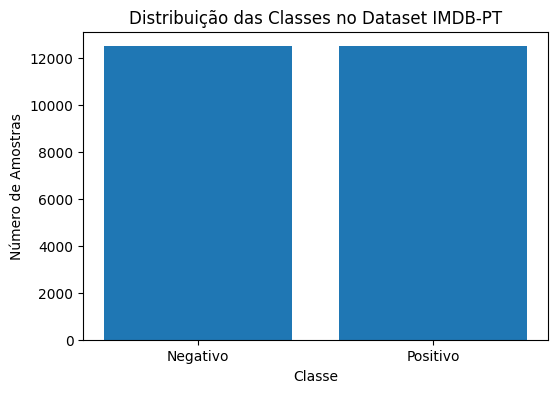

In [20]:
# Plotar a distribuição das classes
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, tick_label=['Negativo', 'Positivo'])
plt.xlabel("Classe")
plt.ylabel("Número de Amostras")
plt.title("Distribuição das Classes no Dataset IMDB-PT")
plt.show()

In [24]:
# Salvar um subconjunto com 50 amostras por classe para testes
df_subset = df.groupby('label', group_keys=False).apply(lambda x: x.sample(50, random_state=42))
print("\nAmostras selecionadas para o subconjunto de testes:")
print(df_subset.head())


Amostras selecionadas para o subconjunto de testes:
                                                    text  label
1766   Uau, que total decepcionado!O fato de as pesso...      0
11919  Se Bob Ludlum visse essa mini série, ele teria...      0
8909   Plantar um filme sobre um fantasma aleijado se...      0
4963   Eles fazem sexo com melões na Ásia.   Ok. Prim...      0
10099  Embora a produção e a direção de Jerry Jameson...      0


/tmp/ipykernel_14054/754463723.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_subset = df.groupby('label', group_keys=False).apply(lambda x: x.sample(50, random_state=42))


In [ ]:
# Quantificar as classes selecionadas
class_counts = df_subset['label'].value_counts()

# Exibir contagem de classes
print("\nDistribuição das classes:")
print(class_counts)


Distribuição das classes:
label
0    50
1    50
Name: count, dtype: int64


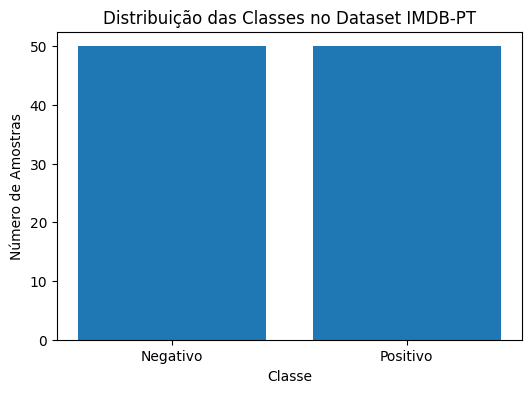

In [ ]:
# Plotar a distribuição das classes selecionadas
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, tick_label=['Negativo', 'Positivo'])
plt.xlabel("Classe")
plt.ylabel("Número de Amostras")
plt.title("Distribuição das Classes no Dataset IMDB-PT")
plt.show()

In [28]:
# Salvar em CSV para uso posterior
df_subset.to_csv("imdb_pt_subset.csv", index=False)